<a href="https://colab.research.google.com/github/INmais/Energy_Services_2022/blob/main/Energy_Services_2022_Office_Hours_06_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Office Hours April 6



##Clustering daily patterns

Using examplee from class 7 "IST_Total_Hourly_Clean.csv"


In [26]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [27]:
#using pandas library to read files and importa data into data frame
raw_data=pd.read_csv('https://raw.githubusercontent.com/INmais/Energy_Services_2022/main/Data/IST_Total_Hourly_Clean.csv')
raw_data = raw_data.set_index('Date Day') # remember to put date as index
raw_data.head()

,Power (kW) [Y],Temperature (C) [X],Hour,Week Day
Date Day,,,,
2015-12-04,1781.0,16.2,18,4
2015-12-04,1462.0,16.2,19,4
2015-12-04,1144.0,15.9,20,4
2015-12-04,982.0,15.6,21,4
2015-12-04,890.0,15.2,22,4


In [28]:
# import KMeans
from sklearn.cluster import KMeans
from pandas import DataFrame
# create kmeans object
model = KMeans(n_clusters=3).fit(raw_data)
pred = model.labels_
pred

array([2, 2, 0, ..., 2, 0, 0], dtype=int32)

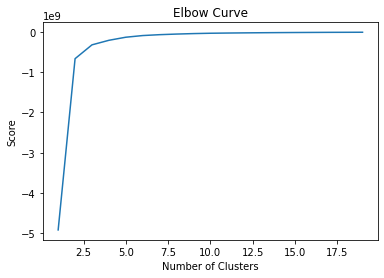

In [29]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(raw_data).score(raw_data) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [30]:
raw_data['Cluster']=pred
raw_data

,Power (kW) [Y],Temperature (C) [X],Hour,Week Day,Cluster
Date Day,,,,,
2015-12-04,1781.0,16.2,18,4,2
2015-12-04,1462.0,16.2,19,4,2
2015-12-04,1144.0,15.9,20,4,0
2015-12-04,982.0,15.6,21,4,0
2015-12-04,890.0,15.2,22,4,0
...,...,...,...,...,...
2017-11-16,2116.0,14.7,17,3,1
2017-11-16,1807.0,14.3,18,3,2
2017-11-16,1464.0,14.0,19,3,2


## For daily patterns

In [31]:
df=raw_data
df=df.drop(columns=['Temperature (C) [X]','Week Day','Cluster']) 
df.rename(columns = {'Power (kW) [Y]': 'Power'}, inplace = True)
df #Check that you have just power and hour

,Power,Hour
Date Day,,
2015-12-04,1781.0,18
2015-12-04,1462.0,19
2015-12-04,1144.0,20
2015-12-04,982.0,21
2015-12-04,890.0,22
...,...,...
2017-11-16,2116.0,17
2017-11-16,1807.0,18
2017-11-16,1464.0,19


In [32]:
#Create a pivot table
df_pivot = df.pivot(columns='Hour')
df_pivot = df_pivot.dropna()
df_pivot

Power                                                             \
Hour           0      1      2      3      4      5       6       7       8    
Date Day                                                                       
2015-12-10  875.0  853.0  851.0  833.0  808.0  818.0   877.0  1173.0  1571.0   
2015-12-11  867.0  853.0  836.0  828.0  826.0  835.0   881.0  1186.0  1577.0   
2015-12-17  869.0  893.0  874.0  849.0  822.0  832.0   853.0  1168.0  1577.0   
2015-12-18  907.0  902.0  892.0  875.0  858.0  860.0   910.0  1184.0  1573.0   
2015-12-22  847.0  843.0  836.0  830.0  820.0  817.0   862.0  1112.0  1455.0   
...           ...    ...    ...    ...    ...    ...     ...     ...     ...   
2017-10-04  863.0  840.0  838.0  830.0  833.0  880.0  1210.0  1801.0  2324.0   
2017-10-07  979.0  936.0  916.0  892.0  865.0  840.0   879.0   904.0   934.0   
2017-10-08  940.0  916.0  914.0  883.0  856.0  826.0   814.0   808.0   812.0   
2017-10-19  829.0  825.0  817.0  808.0  814.0  854.0  1155.0  1795.0  2087.0   
2017-10-20  845.0  829.0  814.0  814.0  806.0  845.0  1177.0  1833.0  2126.0   

                    ...                                                  \
Hour            9   ...      14      15      16      17      18      19   
Date Day            ...                                                   
2015-12-10  1931.0  ...  2353.0  2281.0  2318.0  2099.0  1823.0  1507.0   
2015-12-11  2050.0  ...  2254.0  2342.0  2276.0  2072.0  1810.0  1505.0   
2015-12-17  2009.0  ...  2276.0  2335.0  2303.0  2164.0  1890.0  1607.0   
2015-12-18  2065.0  ...  2188.0  2204.0  2156.0  1968.0  1750.0  1452.0   
2015-12-22  1886.0  ...  2033.0  2107.0  2079.0  1873.0  1558.0  1293.0   
...            ...  ...     ...     ...     ...     ...     ...     ...   
2017-10-04  2607.0  ...  2840.0  2779.0  2513.0  2138.0  1532.0  1201.0   
2017-10-07   963.0  ...  1056.0  1046.0  1021.0  1042.0   997.0   997.0   
2017-10-08   819.0  ...   872.0   884.0   882.0   882.0   883.0   869.0   
2017-10-19  2344.0  ...  2459.0  2342.0  2225.0  1904.0  1433.0  1159.0   
2017-10-20  2404.0  ...  2521.0  2433.0  2230.0  1915.0  1396.0  1127.0   

                                           
Hour            20      21      22     23  
Date Day                                   
2015-12-10  1227.0  1048.0   976.0  939.0  
2015-12-11  1210.0  1040.0   958.0  895.0  
2015-12-17  1329.0  1116.0  1033.0  958.0  
2015-12-18  1162.0   983.0   916.0  882.0  
2015-12-22  1051.0   928.0   883.0  820.0  
...            ...     ...     ...    ...  
2017-10-04  1010.0   954.0   950.0  870.0  
2017-10-07   977.0   964.0   968.0  967.0  
2017-10-08   859.0   845.0   841.0  838.0  
2017-10-19   983.0   915.0   897.0  847.0  
2017-10-20   941.0   875.0   862.0  822.0  

[156 rows x 24 columns]

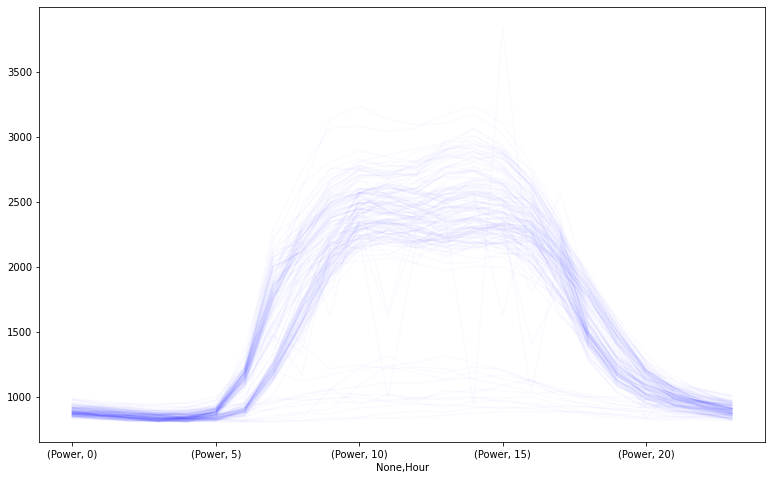

In [33]:
df_pivot.T.plot(figsize=(13,8), legend=False, color='blue', alpha=0.02)

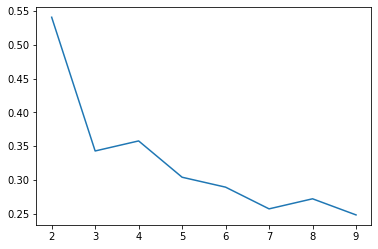

In [34]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score

sillhoute_scores = []
n_cluster_list = np.arange(2,10).astype(int)

X = df_pivot.values.copy()
    
# Very important to scale!
sc = MinMaxScaler()
X = sc.fit_transform(X)

for n_cluster in n_cluster_list:
    
    kmeans = KMeans(n_clusters=n_cluster)
    cluster_found = kmeans.fit_predict(X)
    sillhoute_scores.append(silhouette_score(X, kmeans.labels_))
    
plt.plot(n_cluster_list,sillhoute_scores)

In [36]:
kmeans = KMeans(n_clusters=3)
cluster_found = kmeans.fit_predict(X)
cluster_found_sr = pd.Series(cluster_found, name='cluster')
df_pivot = df_pivot.set_index(cluster_found_sr, append=True )

df_pivot

Power                                                     \
Hour                   0      1      2      3      4      5       6       7    
Date Day   cluster                                                             
2015-12-10 0        875.0  853.0  851.0  833.0  808.0  818.0   877.0  1173.0   
2015-12-11 0        867.0  853.0  836.0  828.0  826.0  835.0   881.0  1186.0   
2015-12-17 0        869.0  893.0  874.0  849.0  822.0  832.0   853.0  1168.0   
2015-12-18 0        907.0  902.0  892.0  875.0  858.0  860.0   910.0  1184.0   
2015-12-22 0        847.0  843.0  836.0  830.0  820.0  817.0   862.0  1112.0   
...                   ...    ...    ...    ...    ...    ...     ...     ...   
2017-10-04 1        863.0  840.0  838.0  830.0  833.0  880.0  1210.0  1801.0   
2017-10-07 2        979.0  936.0  916.0  892.0  865.0  840.0   879.0   904.0   
2017-10-08 2        940.0  916.0  914.0  883.0  856.0  826.0   814.0   808.0   
2017-10-19 1        829.0  825.0  817.0  808.0  814.0  854.0  1155.0  1795.0   
2017-10-20 1        845.0  829.0  814.0  814.0  806.0  845.0  1177.0  1833.0   

                                    ...                                  \
Hour                    8       9   ...      14      15      16      17   
Date Day   cluster                  ...                                   
2015-12-10 0        1571.0  1931.0  ...  2353.0  2281.0  2318.0  2099.0   
2015-12-11 0        1577.0  2050.0  ...  2254.0  2342.0  2276.0  2072.0   
2015-12-17 0        1577.0  2009.0  ...  2276.0  2335.0  2303.0  2164.0   
2015-12-18 0        1573.0  2065.0  ...  2188.0  2204.0  2156.0  1968.0   
2015-12-22 0        1455.0  1886.0  ...  2033.0  2107.0  2079.0  1873.0   
...                    ...     ...  ...     ...     ...     ...     ...   
2017-10-04 1        2324.0  2607.0  ...  2840.0  2779.0  2513.0  2138.0   
2017-10-07 2         934.0   963.0  ...  1056.0  1046.0  1021.0  1042.0   
2017-10-08 2         812.0   819.0  ...   872.0   884.0   882.0   882.0   
2017-10-19 1        2087.0  2344.0  ...  2459.0  2342.0  2225.0  1904.0   
2017-10-20 1        2126.0  2404.0  ...  2521.0  2433.0  2230.0  1915.0   

                                                                   
Hour                    18      19      20      21      22     23  
Date Day   cluster                                                 
2015-12-10 0        1823.0  1507.0  1227.0  1048.0   976.0  939.0  
2015-12-11 0        1810.0  1505.0  1210.0  1040.0   958.0  895.0  
2015-12-17 0        1890.0  1607.0  1329.0  1116.0  1033.0  958.0  
2015-12-18 0        1750.0  1452.0  1162.0   983.0   916.0  882.0  
2015-12-22 0        1558.0  1293.0  1051.0   928.0   883.0  820.0  
...                    ...     ...     ...     ...     ...    ...  
2017-10-04 1        1532.0  1201.0  1010.0   954.0   950.0  870.0  
2017-10-07 2         997.0   997.0   977.0   964.0   968.0  967.0  
2017-10-08 2         883.0   869.0   859.0   845.0   841.0  838.0  
2017-10-19 1        1433.0  1159.0   983.0   915.0   897.0  847.0  
2017-10-20 1        1396.0  1127.0   941.0   875.0   862.0  822.0  

[156 rows x 24 columns]

Text(0.5, 0, 'hour')

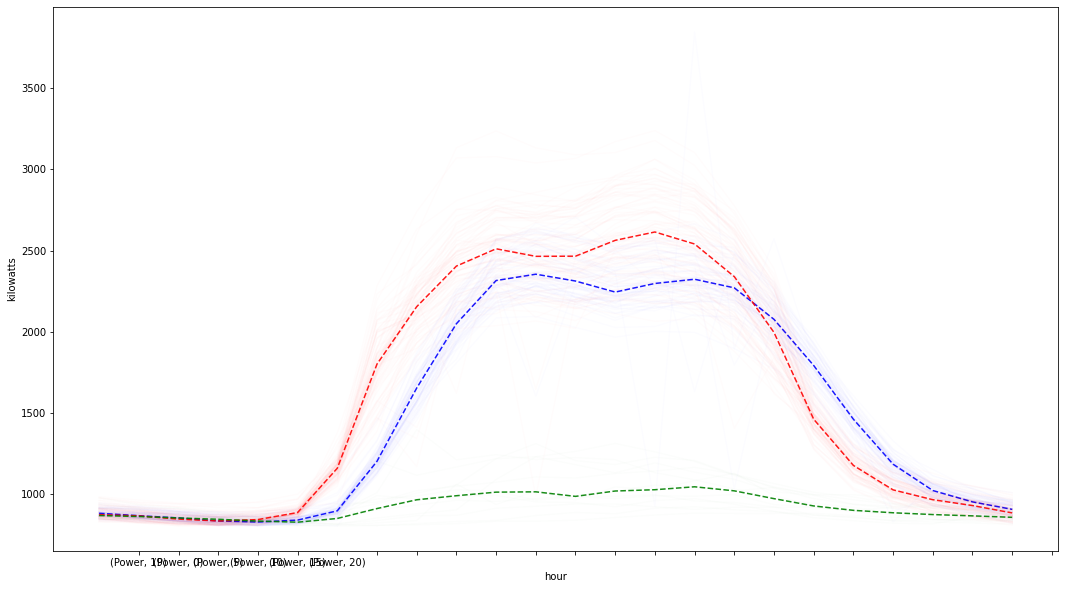

In [37]:
fig, ax= plt.subplots(1,1, figsize=(18,10))
color_list = ['blue','red','green']
cluster_values = sorted(df_pivot.index.get_level_values('cluster').unique())
for cluster, color in zip(cluster_values, color_list):
    df_pivot.xs(cluster, level=1).T.plot(
        ax=ax, legend=False, alpha=0.01, color=color, label= f'Cluster {cluster}'
        )
    df_pivot.xs(cluster, level=1).median().plot(
        ax=ax, color=color, alpha=0.9, ls='--'
    )

ax.set_xticks(np.arange(1,25))
ax.set_ylabel('kilowatts')
ax.set_xlabel('hour')
#ax.legend()